In [3]:
library(xts)
library(TTR)
library(stringr)

In [4]:
#Set Johns Hopkins github data urls
COVIDRecovered <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
COVIDDeaths <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
COVIDConfirmed <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
COVIDUSConfirmed <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
COVIDUSDeaths <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

#Import raw data into data tables
Confirmed <- read.csv(url(COVIDConfirmed),check.names=FALSE)
Deaths <- read.csv(url(COVIDDeaths),check.names=FALSE)
Recovered <- read.csv(url(COVIDRecovered),check.names=FALSE)
USConfirmed <- read.csv(url(COVIDUSConfirmed),check.names=FALSE)
USDeaths <- read.csv(url(COVIDUSDeaths),check.names=FALSE)

#Read US metro areas and aggregate counties
CBSA <- read.csv("CBSA_2020.csv")

CBSA$FIPS <- as.numeric(paste0(str_pad(CBSA$FIPS.State.Code,2,pad="0"),
                               str_pad(CBSA$FIPS.County.Code, 3, pad = "0")))

CBSAConf.df <- aggregate(. ~ CBSA.Title, merge(CBSA,USConfirmed), sum)[,-c(2:18)]
CBSADeath.df <- aggregate(. ~ CBSA.Title, merge(CBSA,USDeaths), sum)[,-c(2:19)]

In [5]:
colnames(Confirmed)[2] <- c("Country")
colnames(Deaths)[2] <- c("Country")
World_conf <- t(aggregate(. ~ Country, Confirmed[-c(1,3,4)], sum))
World_death <- t(aggregate(. ~ Country, Deaths[-c(1,3,4)], sum))
colnames(World_death) <- World_death[1,]
colnames(World_conf) <- World_conf[1,]
World_conf_df <- as.data.frame(World_conf[-1,])
World_conf_df$Date <- as.Date(rownames(World_conf_df), format = "%m/%e/%y")
World_conf_df <- World_conf_df[,c(ncol(World_conf_df),1:(ncol(World_conf_df)-1))]
World_conf_df[,-1] <- lapply(World_conf_df[,-1], function(x) {as.numeric(as.character(x))})
World_conf_xts <- xts(World_conf_df[,-1], order.by=World_conf_df[,1])
World_death_df <- as.data.frame(World_death[-1,])
World_death_df$Date <- as.Date(rownames(World_death_df), format = "%m/%e/%y")
World_death_df <- World_death_df[,c(ncol(World_death_df),1:(ncol(World_death_df)-1))]
World_death_df[,-1] <- lapply(World_death_df[,-1], function(x) {as.numeric(as.character(x))})
World_death_xts <- xts(World_death_df[,-1], order.by=World_death_df[,1])

In [6]:
World_conf_Q2_2020 <- data.frame(t(diff(World_conf_xts[c("2020-01-22","2020-03-31","2020-06-30","2020-09-30")])[2:3]))
World_conf_Q3_2020 <- data.frame(t(diff(World_conf_xts[c("2020-01-22","2020-03-31","2020-06-30","2020-09-30")])[2:4]))
World_death_Q2_2020 <- data.frame(t(diff(World_death_xts[c("2020-01-22","2020-03-31","2020-06-30","2020-09-30")])[2:3]))
World_death_Q3_2020 <- data.frame(t(diff(World_death_xts[c("2020-01-22","2020-03-31","2020-06-30","2020-09-30")])[2:4]))

In [7]:
colnames(World_conf_Q3_2020) <- c("Q1_case_change", "Q2_case_change", "Q3_case_change")
colnames(World_death_Q3_2020) <- c("Q1_death_change", "Q2_death_change", "Q3_death_change")
World_conf_Q3_2020 <- cbind(Country = rownames(World_conf_Q3_2020), World_conf_Q3_2020)
World_death_Q3_2020 <- cbind(Country = rownames(World_death_Q3_2020), World_death_Q3_2020)

In [8]:
World_total_quarterly <- merge(World_conf_Q3_2020, World_death_Q3_2020, by="Country")

In [9]:
write.csv(World_total_quarterly, "COVID_Q3_totals.csv")

In [10]:
popden <- read.csv("PopulationDensity2018.csv",stringsAsFactors=FALSE)[,-c(1)]
popden[,2] <- as.numeric(popden[,2])
colnames(popden) <- c("Country","Density2018")
popurb <- read.csv("PopulationUrbanPercent2018.csv",stringsAsFactors=FALSE)[,-c(1)]
popurb[,2] <- as.numeric(popurb[,2])
colnames(popurb) <- c("Country","Urban2018")
poptot <- read.csv("PopulationTotal2018.csv",stringsAsFactors=FALSE)[,-c(1)]
poptot[,2] <- as.numeric(poptot[,2])
colnames(poptot) <- c("Country","Population2018")

In [11]:
World_conf_Q3_2020_raw <- data.frame(t(World_conf_xts[c("2020-01-22","2020-03-31","2020-06-30","2020-09-30")][2:4]))
World_death_Q3_2020_raw <- data.frame(t(World_death_xts[c("2020-01-22","2020-03-31","2020-06-30","2020-09-30")][2:4]))

In [12]:
colnames(World_conf_Q3_2020_raw) <- c("Q1_2020_cases", "Q2_2020_cases", "Q3_2020_cases")
World_conf_Q3_2020_raw$Country = rownames(World_conf_Q3_2020_raw)
colnames(World_death_Q3_2020_raw) <- c("Q1_2020_deaths", "Q2_2020_deaths", "Q3_2020_deaths")
World_death_Q3_2020_raw$Country = rownames(World_death_Q3_2020_raw)

In [13]:
poptot[poptot$Country == "United States",]$Country <- c("US")
poptot[poptot$Country == "Bahamas, The",]$Country <- c("Bahamas")
poptot[poptot$Country == "Brunei Darussalam",]$Country <- c("Brunei")
poptot[poptot$Country == "Congo, Dem. Rep.",]$Country <- c("Congo (Kinshasa)")
poptot[poptot$Country == "Congo, Rep.",]$Country <- c("Congo (Brazzaville)")
poptot[poptot$Country == "Gambia, The",]$Country <- c("Gambia")
poptot[poptot$Country == "Czech Republic",]$Country <- c("Czechia")
poptot[poptot$Country == "Egypt, Arab Rep.",]$Country <- c("Egypt")
poptot[poptot$Country == "Iran, Islamic Rep.",]$Country <- c("Iran")
poptot[poptot$Country == "Korea, Rep.",]$Country <- c("Korea, South")
poptot[poptot$Country == "Kyrgyz Republic",]$Country <- c("Kyrgyzstan")
poptot[poptot$Country == "Lao PDR",]$Country <- c("Laos")
poptot[poptot$Country == "Russian Federation",]$Country <- c("Russia")
poptot[poptot$Country == "Slovak Republic",]$Country <- c("Slovakia")
poptot[poptot$Country == "Syrian Arab Republic",]$Country <- c("Syria")
poptot[poptot$Country == "Yemen, Rep.",]$Country <- c("Yemen")
poptot[poptot$Country == "Venezuela, RB",]$Country <- c("Venezuela")

popurb[popurb$Country == "United States",]$Country <- c("US")
popurb[popurb$Country == "Bahamas, The",]$Country <- c("Bahamas")
popurb[popurb$Country == "Brunei Darussalam",]$Country <- c("Brunei")
popurb[popurb$Country == "Congo, Dem. Rep.",]$Country <- c("Congo (Kinshasa)")
popurb[popurb$Country == "Congo, Rep.",]$Country <- c("Congo (Brazzaville)")
popurb[popurb$Country == "Gambia, The",]$Country <- c("Gambia")
popurb[popurb$Country == "Czech Republic",]$Country <- c("Czechia")
popurb[popurb$Country == "Egypt, Arab Rep.",]$Country <- c("Egypt")
popurb[popurb$Country == "Iran, Islamic Rep.",]$Country <- c("Iran")
popurb[popurb$Country == "Korea, Rep.",]$Country <- c("Korea, South")
popurb[popurb$Country == "Kyrgyz Republic",]$Country <- c("Kyrgyzstan")
popurb[popurb$Country == "Lao PDR",]$Country <- c("Laos")
popurb[popurb$Country == "Russian Federation",]$Country <- c("Russia")
popurb[popurb$Country == "Slovak Republic",]$Country <- c("Slovakia")
popurb[popurb$Country == "Syrian Arab Republic",]$Country <- c("Syria")
popurb[popurb$Country == "Yemen, Rep.",]$Country <- c("Yemen")
popurb[popurb$Country == "Venezuela, RB",]$Country <- c("Venezuela")

popden[popden$Country == "United States",]$Country <- c("US")
popden[popden$Country == "Bahamas, The",]$Country <- c("Bahamas")
popden[popden$Country == "Brunei Darussalam",]$Country <- c("Brunei")
popden[popden$Country == "Congo, Dem. Rep.",]$Country <- c("Congo (Kinshasa)")
popden[popden$Country == "Congo, Rep.",]$Country <- c("Congo (Brazzaville)")
popden[popden$Country == "Gambia, The",]$Country <- c("Gambia")
popden[popden$Country == "Czech Republic",]$Country <- c("Czechia")
popden[popden$Country == "Egypt, Arab Rep.",]$Country <- c("Egypt")
popden[popden$Country == "Iran, Islamic Rep.",]$Country <- c("Iran")
popden[popden$Country == "Korea, Rep.",]$Country <- c("Korea, South")
popden[popden$Country == "Kyrgyz Republic",]$Country <- c("Kyrgyzstan")
popden[popden$Country == "Lao PDR",]$Country <- c("Laos")
popden[popden$Country == "Russian Federation",]$Country <- c("Russia")
popden[popden$Country == "Slovak Republic",]$Country <- c("Slovakia")
popden[popden$Country == "Syrian Arab Republic",]$Country <- c("Syria")
popden[popden$Country == "Yemen, Rep.",]$Country <- c("Yemen")
popden[popden$Country == "Venezuela, RB",]$Country <- c("Venezuela")

In [14]:
conf_poptot <- merge(World_conf_Q3_2020_raw,poptot,by="Country")

death_poptot <- merge(World_death_Q3_2020_raw,poptot,by="Country")


In [15]:
head(conf_poptot)

Country,Q1_2020_cases,Q2_2020_cases,Q3_2020_cases,Population2018
Afghanistan,175,31507,39268,37172386
Albania,243,2535,13649,2866376
Algeria,716,13907,51530,42228429
Andorra,376,855,2050,77006
Angola,7,284,4972,30809762
Antigua and Barbuda,7,69,101,96286


In [16]:
for (i in 2:4) {
    conf_poptot[,paste0("Q",i-1,"rate100k","cases")] <- (conf_poptot[,i]/conf_poptot$Population2018)*100000
    death_poptot[,paste0("Q",i-1,"rate100k","deaths")] <- (death_poptot[,i]/death_poptot$Population2018)*100000
}

In [17]:
COVID_Totals_Demo <- merge(conf_poptot[,-5], death_poptot[,-5], by="Country")
COVID_Totals_Demo <- merge(COVID_Totals_Demo,poptot,by="Country")
COVID_Totals_Demo <- merge(COVID_Totals_Demo,popden,by="Country")
COVID_Totals_Demo <- merge(COVID_Totals_Demo,popurb,by="Country")

In [18]:
head(COVID_Totals_Demo)

Country,Q1_2020_cases,Q2_2020_cases,Q3_2020_cases,Q1rate100kcases,Q2rate100kcases,Q3rate100kcases,Q1_2020_deaths,Q2_2020_deaths,Q3_2020_deaths,Q1rate100kdeaths,Q2rate100kdeaths,Q3rate100kdeaths,Population2018,Density2018,Urban2018
Afghanistan,175,31507,39268,0.47077957,84.7591543,105.63756,4,752,1460,0.010760676,2.02300708,3.9276467,37172386,56.93776,25.495
Albania,243,2535,13649,8.47760378,88.4391999,476.17619,15,62,387,0.523308875,2.16301002,13.5013690,2866376,104.61226,60.319
Algeria,716,13907,51530,1.69554022,32.9327904,122.02680,44,912,1736,0.104195209,2.15968252,4.1109746,42228429,17.73008,72.629
Andorra,376,855,2050,488.27364101,1110.3030933,2662.13022,12,52,53,15.583201309,67.52720567,68.8258058,77006,163.84255,88.062
Angola,7,284,4972,0.02272007,0.9217858,16.13774,2,13,183,0.006491449,0.04219442,0.5939676,30809762,24.71305,65.514
Antigua and Barbuda,7,69,101,7.27000810,71.6615084,104.89583,0,3,3,0.000000000,3.11571776,3.1157178,96286,218.83182,24.599


In [19]:
write.csv(COVID_Totals_Demo, "COVID_Totals_Demo.csv")

In [20]:
library(ggplot2)

Warning message:
"Removed 1 rows containing missing values (position_stack)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

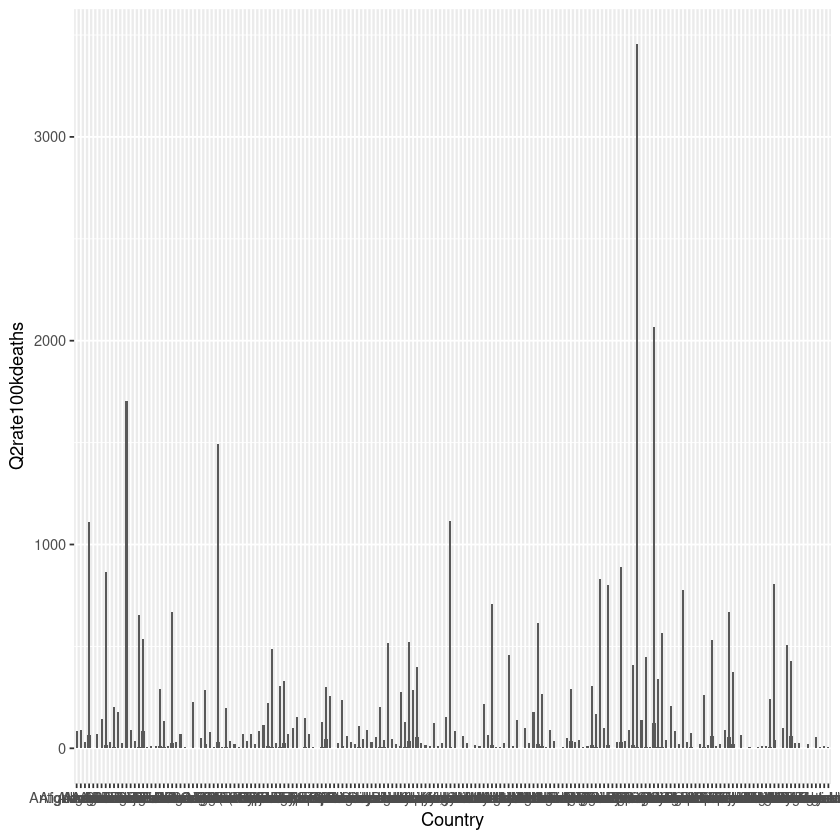

In [55]:
ggplot(COVID_Totals_Demo,aes(x = Country)) +
    geom_bar(aes(y = Q2rate100kdeaths), stat="identity") +
    geom_bar(aes(y = Q2rate100kcases),stat="identity",position="dodge", width = 0.5)